# La edad del fondo marino [100 puntos]

**Objetivos:**
- Cargar y visualizar la edad del fondo marino.
- Hacer inferencias a partir de como se distribuye la edad del fondo marino con los procesos tectónicos. 

## Setup

Correr esta celda que contiene las librerías necesarias para llevar acabo la tarea.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# https://twitter.com/Sydonahi/status/1301651295808270336
from matplotlib import cm
from cartopy import config
import cartopy.crs as ccrs

### Cargando la edad del fondo marino

Cargaremos los datos como un Pandas dataframe usando la función `pd.read_csv`.

- la columna 1 es la longitud en grados
- la columna 2 es la latitud en grados
- la columna 3 es la edad del fondo marino en millones de años


In [2]:
seafloor_age_data = pd.read_csv('data/age.csv')
seafloor_age_data.head()

,longitude,latitude,age_Ma
0,-180.0,90.0,55.569
1,-179.8,90.0,55.568
2,-179.6,90.0,55.568
3,-179.4,90.0,55.569
4,-179.2,90.0,55.569


Los Pandas dataframe son súper útiles y los usaremos mucho. Mira este video para obtener una introducción a la librería de pandas.

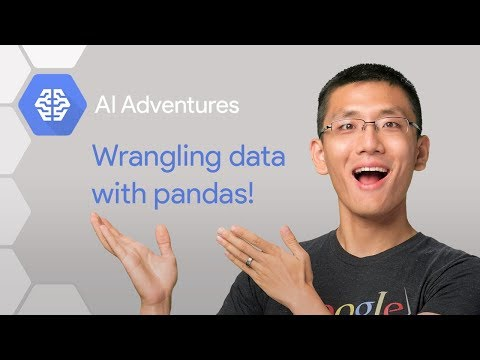

In [3]:
from IPython.display import YouTubeVideo
# Wrangling Data with Pandas
YouTubeVideo('XDAnFZqJDvI', width="1000", height="500")

Como lo presentó Yufeng, la función `describe` proporciona estadísticas resumidas en un dataframe. Nuestro dataframe se llama `seafloor_age_data`. Al igual que aplicamos la función `.head ()` al dataframe después de importarlo, la función `describe` se puede aplicar al dataframe para obtener este resumen. Haga esto en la celda de abajo.

In [5]:
# Aplicar la función descrita aquí 
seafloor_age_data.describe(include='all')

,longitude,latitude,age_Ma
count,1.622701e+06,1.622701e+06,843805.000000
mean,4.553916e-19,-9.685129e-16,63.731686
std,1.039808e+02,5.201924e+01,45.219148
min,-1.800000e+02,-9.000000e+01,0.000000
25%,-9.000000e+01,-4.500000e+01,25.750000
50%,0.000000e+00,-4.996000e-15,54.981000
75%,9.000000e+01,4.500000e+01,97.539000
max,1.800000e+02,9.000000e+01,280.000000


**¿Qué edad tiene el lecho marino más antiguo en comparación con la edad de la Tierra y por qué hay una diferencia tan grande?** [20 puntos]

280 millones de años. Considerando que la Tierra tiene 4.543 millones de años, podemos pensar que esta gran "insignificancia" de la antigüedad del lecho marino más antiguo con respecto a la Tierra puede deberse al movimiento de las placas tectónicas, que pueden generar que las fozas marinas (y montañas) cambien constantemente.

### Histograma de la edad del fondo marino [20 puntos]

#### Acceder a los datos de una columna en específico

Como Yufeng describió en el video, se puede acceder a los valores de una columna en particular dentro de un dataframe utilizando la notación entre corchetes. Entonces, para obtener los valores correspondientes a la edad, podemos usar la notación `seafloor_age_data ['age_Ma']` como en la celda de abajo:

In [14]:
seafloor_age_data['age_Ma']

0          55.569
1          55.568
2          55.568
3          55.569
4          55.569
            ...  
1622696       NaN
1622697       NaN
1622698       NaN
1622699       NaN
1622700       NaN
Name: age_Ma, Length: 1622701, dtype: float64

Podemos usar `seafloor_age_data ['age_Ma']` como input de un histograma. En clase, hicimos el histograma de la. elevación global. Aquí debe realizar lo mismo pero con la edad del lecho marino. No olvide rotular los ejes y especificar el titulo. 

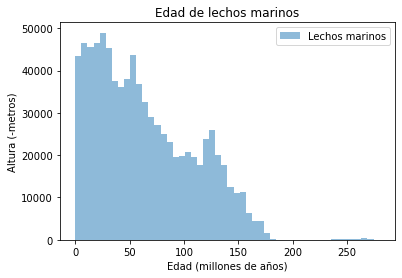

In [13]:
#Espacio para hacer el histograma
plt.hist(seafloor_age_data['age_Ma'],bins=50,label='Lechos marinos',alpha=0.5)
#plt.hist(topo_grid,bins=50,label='Earth elevation data',alpha=0.5)

plt.xlabel('Edad (millones de años)')
plt.ylabel('Altura (-metros)')
plt.title('Edad de lechos marinos')
plt.legend()
plt.show()

### El mapa de la edad del fondo marino [20 puntos por el mapa; 20 puntos por cada pregunta]

Para hacer el mapa, hagamos que las columnas del Pandas dataframe sean matrices numpy.

In [15]:
age_longitude = np.asarray(seafloor_age_data['longitude'])
age_latitude = np.asarray(seafloor_age_data['latitude'])
age = np.asarray(seafloor_age_data['age_Ma'])

Como hicimos en clase, necesitamos cambiar las dimensiones de las matrices para poder mapear. Cambie la forma de los datos en cuadrículas de tamaño (901,1801).

Reemplace los `...` abajo para hacer esto.

In [16]:
age_grid = age.reshape(901,1801)
age_lon_grid = age_longitude.reshape(901,1801)
age_lat_grid = age_latitude.reshape(901,1801)

In [17]:
age_grid.shape

(901, 1801)

Cree el mapa de la edad del lecho marino.

Reemplace ... a continuación en `plt.contourf` para hacer tal mapa.

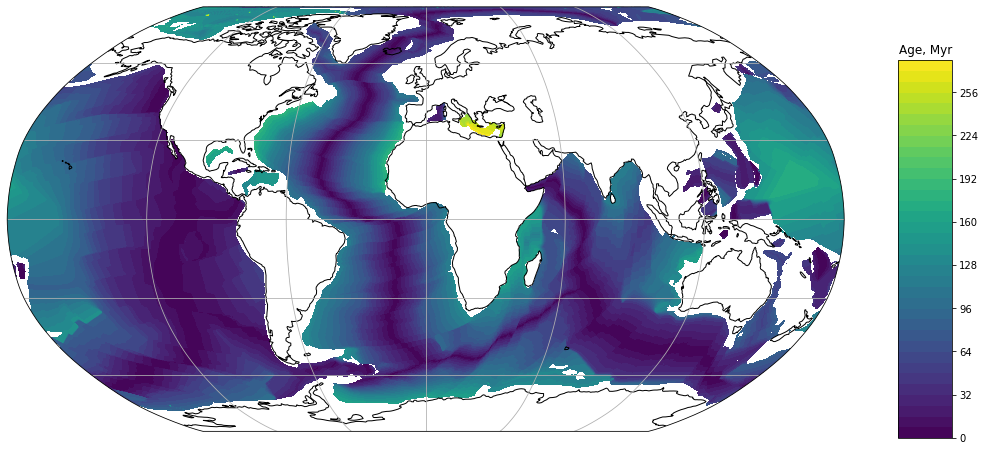

In [39]:
plt.figure(1,(15,15))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
plt.contourf(age_lon_grid,age_lat_grid,age_grid,levels=40,transform=ccrs.PlateCarree())

ax.coastlines()
ax.gridlines()

color_ax = plt.axes([0.95, 0.3, 0.05, 0.35])
plt.colorbar(cax=color_ax) 
plt.title('Age, Myr'); 

plt.show()

¿Qué patrones observas? ¿Dónde está el fondo marino más joven en relación con las dorsales del fondo marino que observamos en nuestro mapa topográfico? ¿Dónde está el fondo marino más antiguo?

Se observa que a mayor cercanía con los continentes, más antiguo es el fondo marino. Se puede observar también que el fondo marino más joven es en el Mar Mediterráneo y el más nuevo es en el océano pácifico sur.

¿A dónde fue el fondo marino más antiguo?

En el Mar Mediterráneo